## TSF GRIP May 2021
#### Name : Hemant Banke

From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

## Getting the Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
print(os.getcwd())

/home/hyena0/jupyter_p


In [3]:
# get the data
filename = './Iris.csv'

df = pd.read_csv(filename, header = 0, na_filter = False, index_col = 0)
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa


In [4]:
len(df)

150

## Exploratory Data Analysis

In [5]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


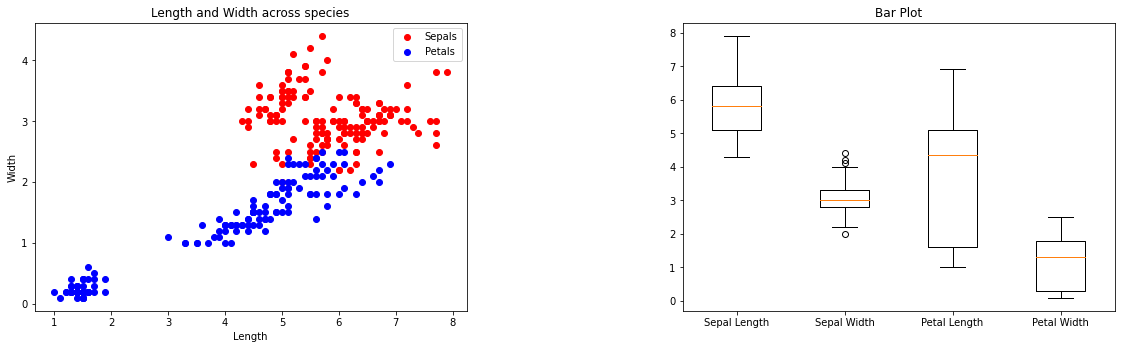

In [6]:
# Checking relation in length and width across species

fig_lw = plt.figure()
ax = fig_lw.add_axes([0,0,1,1])
ax.scatter(df.SepalLengthCm, df.SepalWidthCm, color='r', label='Sepals')
ax.scatter(df.PetalLengthCm, df.PetalWidthCm, color='b', label='Petals')
ax.set_xlabel('Length')
ax.set_ylabel('Width')
ax.set_title('Length and Width across species')
ax.legend()

ax2 = fig_lw.add_axes([1.5, 0, 1, 1])
ax2.boxplot(df.loc[:, 'SepalLengthCm':'PetalWidthCm'], labels=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
ax2.set_title('Bar Plot')
plt.show()

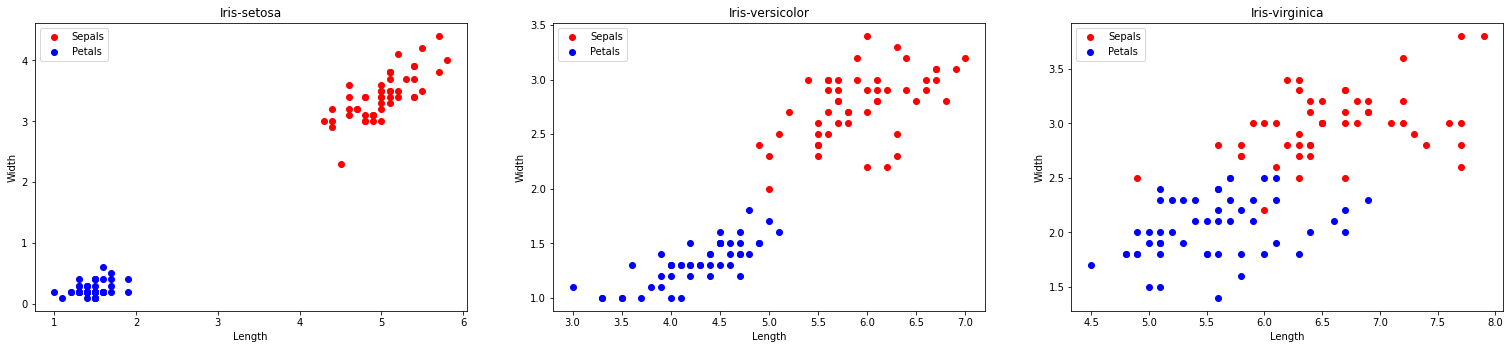

In [7]:
# Checking Sepal and Petal width and length of different species

species = np.array(df.Species.unique())

fig_species = plt.figure()
ind = 0
for specie in species:
    df_specie = df[df.Species == specie]
    
    ax = fig_species.add_axes([0 + ind*1.2, 0, 1, 1])
    ax.scatter(df_specie.SepalLengthCm, df_specie.SepalWidthCm, color='r', label='Sepals')
    ax.scatter(df_specie.PetalLengthCm, df_specie.PetalWidthCm, color='b', label='Petals')
    ax.set_xlabel('Length')
    ax.set_ylabel('Width')
    ax.set_title(specie)
    ax.legend()
    
    ind += 1
    
plt.show()

Across species we can see a distinct behaviour in relation b/w Length and Width of Sepals and Petals. In `Iris-setosa` Petals are very small compared to Petals. In `Iris-virginica` this seperation diminishes.

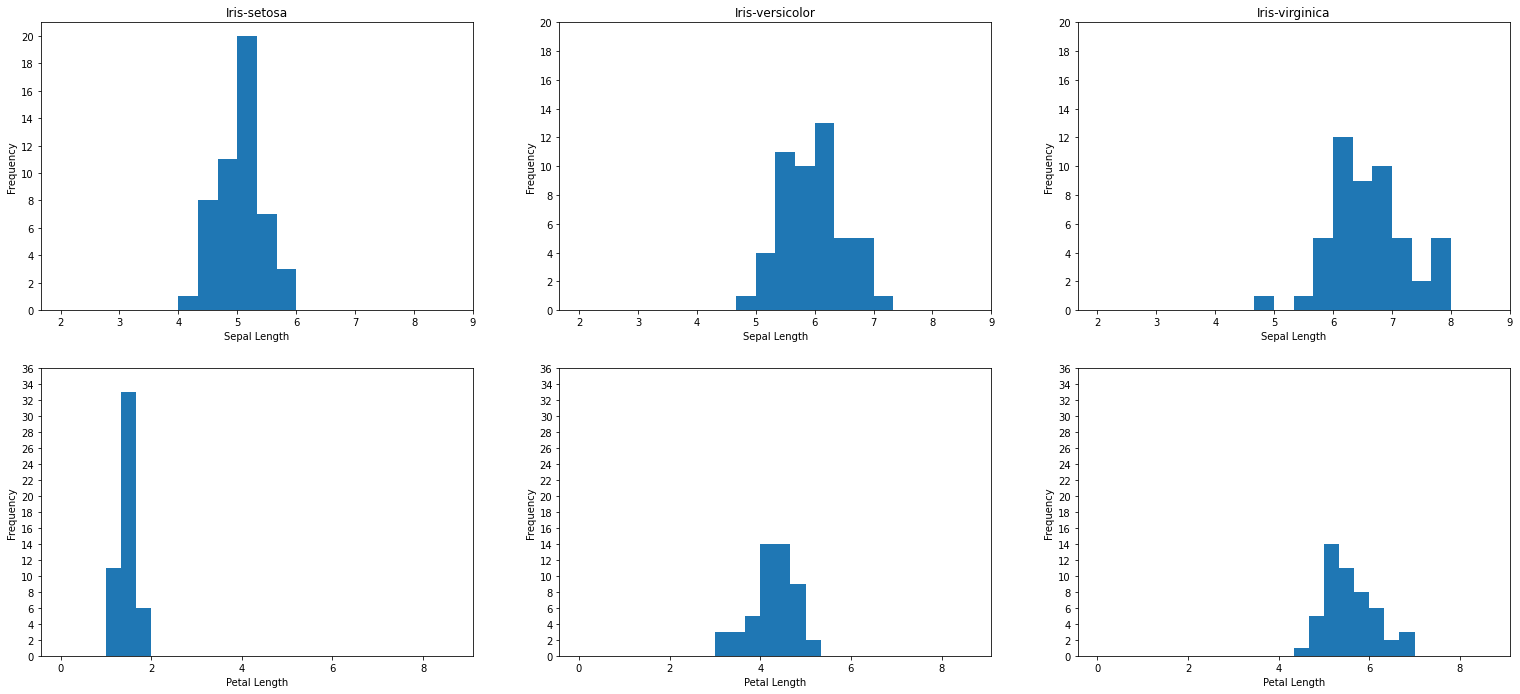

In [11]:
# Comparing Sepal and Petal lengths of different species

fig_lengths = plt.figure()
ind = 0
for specie in species:
    df_specie = df[df.Species == specie]
    
    ax = fig_lengths.add_axes([0 + ind*1.2, 0, 1, 1])
    ax.hist(df_specie.SepalLengthCm, bins = [i/3 for i in range(2*3, 9*3)])
    ax.set_yticks(np.arange(0, 22,2));
    ax.set_ylabel('Frequency')
    ax.set_xlabel('Sepal Length')
    ax.set_title(specie)
    
    ax2 = fig_lengths.add_axes([0 + ind*1.2, -1.2, 1, 1])
    ax2.hist(df_specie.PetalLengthCm, bins = [i/3 for i in range(0*3, 9*3)])
    ax2.set_yticks(np.arange(0, 38,2));
    ax2.set_ylabel('Frequency')
    ax2.set_xlabel('Petal Length')
    
    ind += 1
    
plt.show()

## K-Means Clustering

In [14]:
data = df.loc[:, 'SepalLengthCm':'PetalWidthCm'].values

Finding the optimal number of clusters using the elbow method. The optimal number is from where WCSS doesn't decrease significantly on next iterations.

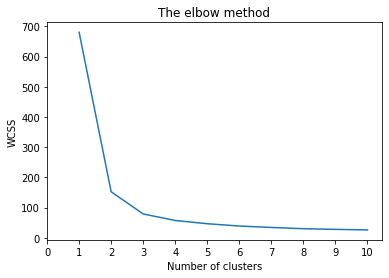

In [17]:
# Finding the optimum number of clusters for k-means classification

from sklearn.cluster import KMeans

# Within cluster sum of squares
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.xticks(np.arange(0, 11, 1))
plt.ylabel('WCSS')
plt.show()

Clearly WCSS doesn't decrease significantly after n > 3. **Hence, the optimal number of clusters is 3**.

In [18]:
# Create kmeans classifier with 3 clusters

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(data)

In [20]:
# Get Cluster Centroids

cluster_centroids = kmeans.cluster_centers_
cluster_centroids

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [23]:
# Check returned clusters

y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

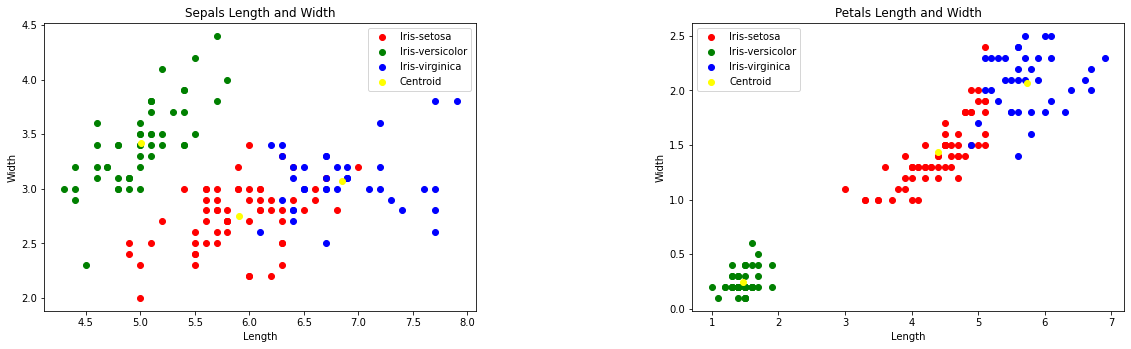

In [27]:
# Visualising the clusters

fig_cluster = plt.figure()
ax1 = fig_cluster.add_axes([0,0,1,1])
ax2 = fig_cluster.add_axes([1.5, 0, 1, 1])

cols = ['r', 'g', 'b']

for i in range(3):
    ax1.scatter(data[y_kmeans == i, 0], data[y_kmeans == i, 1], color=cols[i], label=species[i])
    ax2.scatter(data[y_kmeans == i, 2], data[y_kmeans == i, 3], color=cols[i], label=species[i])

# Visualize the centroids
ax1.scatter(cluster_centroids[:, 0], cluster_centroids[:, 1], color='yellow', label='Centroid')
ax2.scatter(cluster_centroids[:, 2], cluster_centroids[:, 3], color='yellow', label='Centroid')
    
ax1.set_xlabel('Length')
ax1.set_ylabel('Width')
ax1.set_title('Sepals Length and Width')
ax1.legend()

ax2.set_xlabel('Length')
ax2.set_ylabel('Width')
ax2.set_title('Petals Length and Width')
ax2.legend()

plt.show()